In [36]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [37]:
# Cargar los datos desde los archivos
clustered_store_data = pd.read_csv('clustered_store_data.csv')
train_data = pd.read_csv('train.csv')

# Combinar los datos de train con los datos de store usando la columna 'Store' como clave
combined_data = pd.merge(train_data, clustered_store_data, on='Store')

# Visualización de las primeras filas del DataFrame combinado para verificar la fusión correcta
combined_data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Cluster
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2


In [38]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month


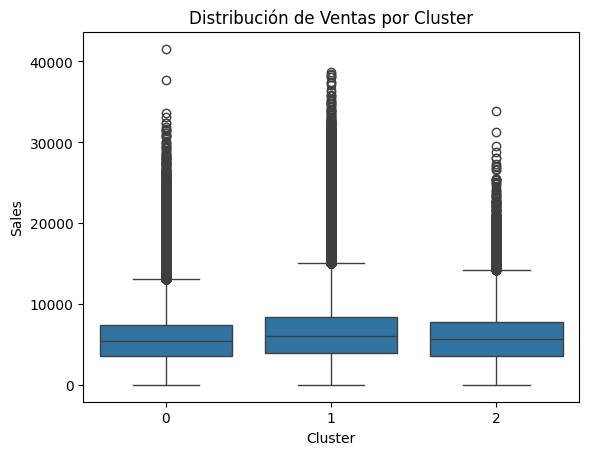

In [39]:
# Ejemplo: Visualización de ventas por cluster
sns.boxplot(x='Cluster', y='Sales', data=combined_data)
plt.title('Distribución de Ventas por Cluster')
plt.show()


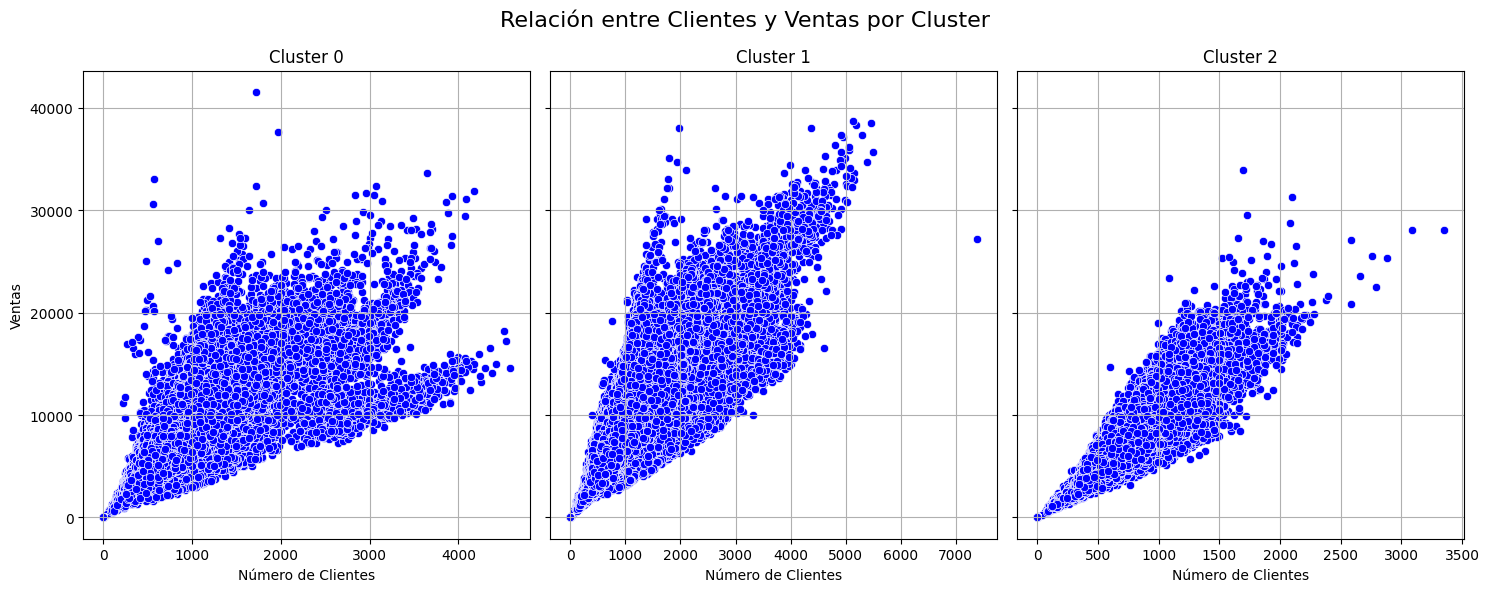

In [40]:
clusters = combined_data['Cluster'].unique()  
n_clusters = len(clusters) 

# Configuración del tamaño del subplot basado en el número de clusters
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(5 * n_clusters, 6), sharey=True)

for i, cluster in enumerate(sorted(clusters)):
    cluster_data = combined_data[combined_data['Cluster'] == cluster]
    ax = axes[i] if n_clusters > 1 else axes
    sns.scatterplot(data=cluster_data, x='Customers', y='Sales', ax=ax, color='blue', edgecolor='w')
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Número de Clientes')
    ax.set_ylabel('Ventas')
    ax.grid(True)  

plt.suptitle('Relación entre Clientes y Ventas por Cluster', fontsize=16)
plt.tight_layout()
plt.show()


In [41]:
# Ver columnas con valores faltantes
columns_with_nan = combined_data.columns[combined_data.isnull().any()].tolist()
print("Columnas con valores faltantes:", columns_with_nan)

# Mostrar el resumen de valores faltantes en esas columnas
missing_summary = combined_data[columns_with_nan].isnull().sum()
print("\nResumen de valores faltantes en esas columnas:\n", missing_summary)


Columnas con valores faltantes: ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Resumen de valores faltantes en esas columnas:
 CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [42]:
# Convertir variables categóricas en dummies
combined_data = pd.get_dummies(combined_data, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])

# Ver las nuevas columnas añadidas
print(combined_data.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Cluster', 'Year', 'Month', 'StateHoliday_0',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')


In [43]:
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,...,False,False,True,False,True,False,False,False,False,False
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11.0,...,True,False,False,False,True,False,False,False,True,False
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,12.0,...,True,False,False,False,True,False,False,False,True,False
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,9.0,...,False,False,True,False,False,False,True,False,False,False
4,5,5,2015-07-31,4822,559,1,1,1,29910.0,4.0,...,True,False,False,False,True,False,False,False,False,False


In [44]:
# Imputamos los valores faltantes de "CompetitionDistance" con la mediana para no alterar el conjunto total.
combined_data['CompetitionDistance'].fillna(combined_data['CompetitionDistance'].median(), inplace=True)


In [45]:
# Si no hay promoción rellenamos con cero
combined_data['Promo2SinceWeek'].fillna(0, inplace=True)
combined_data['Promo2SinceYear'].fillna(0, inplace=True)


In [46]:
# Eliminamos del data los días que estuvo cerrado ya que no hubo ventas, ni clientes.
combined_data = combined_data[combined_data['Open'] != 0]

combined_data.drop('Open', axis=1, inplace=True)

In [47]:
# Tratamos la fecha como variable temporal y añadimos si es día o fin de semana.
combined_data['Day'] = combined_data['Date'].dt.day
combined_data['IsWeekend'] = combined_data['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)


In [48]:
# Ver columnas con valores faltantes
columns_with_nan = combined_data.columns[combined_data.isnull().any()].tolist()
print("Columnas con valores faltantes:", columns_with_nan)

# Mostrar el resumen de valores faltantes en esas columnas
missing_summary = combined_data[columns_with_nan].isnull().sum()
print("\nResumen de valores faltantes en esas columnas:\n", missing_summary)


Columnas con valores faltantes: ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

Resumen de valores faltantes en esas columnas:
 CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
dtype: int64


In [49]:
# Crear indicadores de valores faltantes
combined_data['CompetitionOpenSinceMonth_missing'] = combined_data['CompetitionOpenSinceMonth'].isnull().astype(int)
combined_data['CompetitionOpenSinceYear_missing'] = combined_data['CompetitionOpenSinceYear'].isnull().astype(int)

# Imputamos las columnas con valor negativo
combined_data['CompetitionOpenSinceMonth'].fillna(-1, inplace=True)
combined_data['CompetitionOpenSinceYear'].fillna(-1, inplace=True)


In [50]:
# Ver columnas con valores faltantes
columns_with_nan = combined_data.columns[combined_data.isnull().any()].tolist()
print("Columnas con valores faltantes:", columns_with_nan)

# Mostrar el resumen de valores faltantes en esas columnas
missing_summary = combined_data[columns_with_nan].isnull().sum()
print("\nResumen de valores faltantes en esas columnas:\n", missing_summary)


Columnas con valores faltantes: []

Resumen de valores faltantes en esas columnas:
 Series([], dtype: float64)


In [51]:
duplicate_columns = combined_data.columns[combined_data.columns.duplicated()].tolist()
duplicate_columns

['StateHoliday_0']

In [52]:
combined_data.to_csv('data_clean.csv', index=False)